<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X['MDEV'] = boston.target


In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
with pd.option_context('display.max_rows', 999):
    display(X)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [5]:
X.shape

(506, 14)

In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# A:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MDEV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [9]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

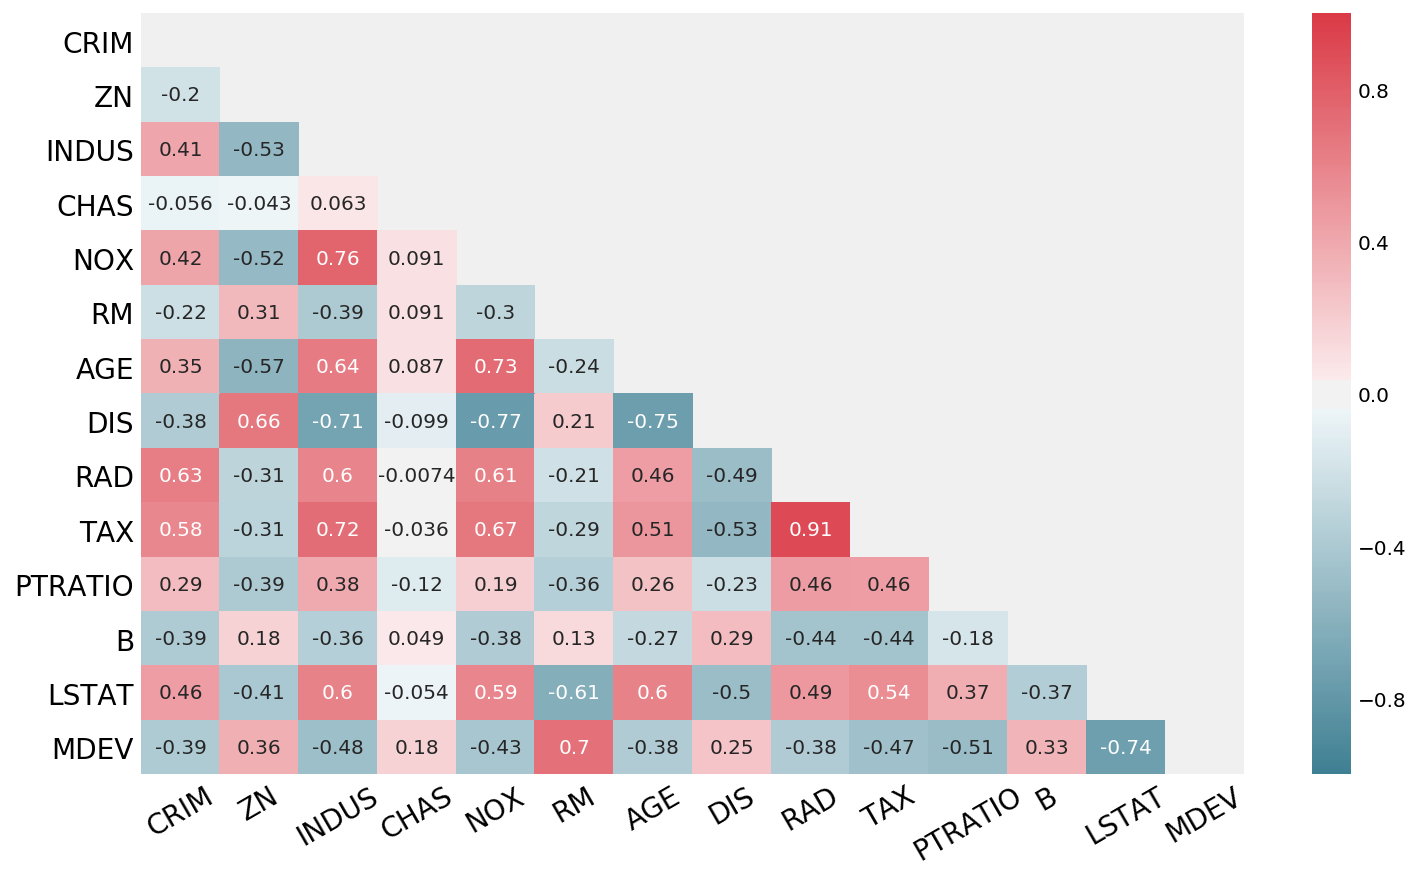

In [10]:
correlation_heat_map(X)

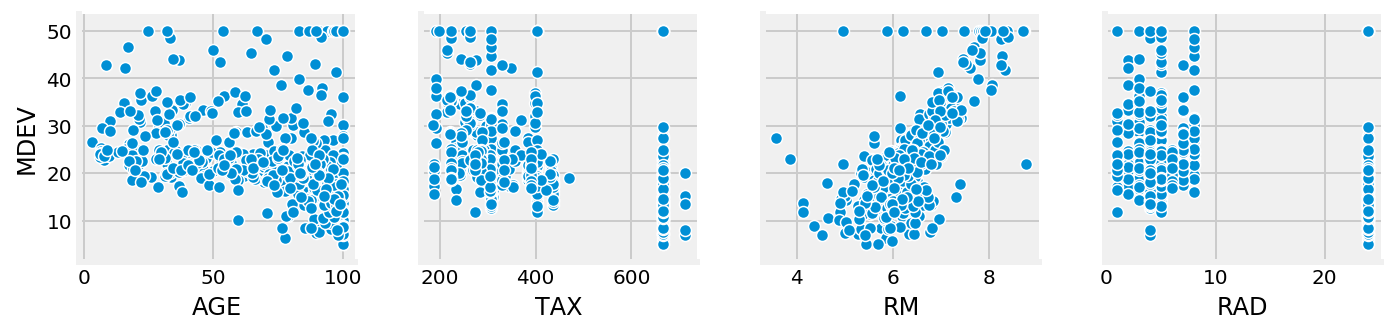

In [11]:
sns.pairplot(X, x_vars=('AGE','TAX','RM','RAD'), y_vars='MDEV')

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [12]:
y=X[['MDEV']]
x1= X[['AGE']]
x2 = X[['TAX']]
x3 = X[['RM']]
x4 = X[['RAD']]

In [21]:
x1.head()


,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2


In [14]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=.5, shuffle= True)

In [15]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(253, 1) (253, 1)
(253, 1) (253, 1)


train score:  0.1299616669003414
test score:  0.15091613839161955


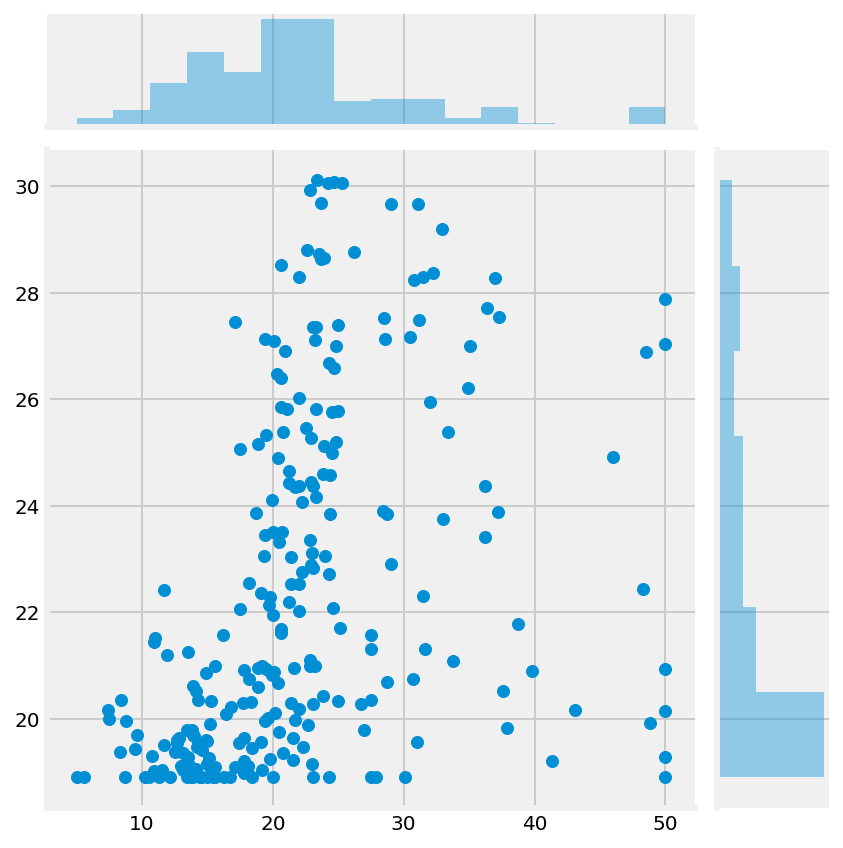

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=.5, shuffle= True)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(253, 1) (253, 1)
(253, 1) (253, 1)


train score:  0.22945551151208624
test score:  0.20724847926623532


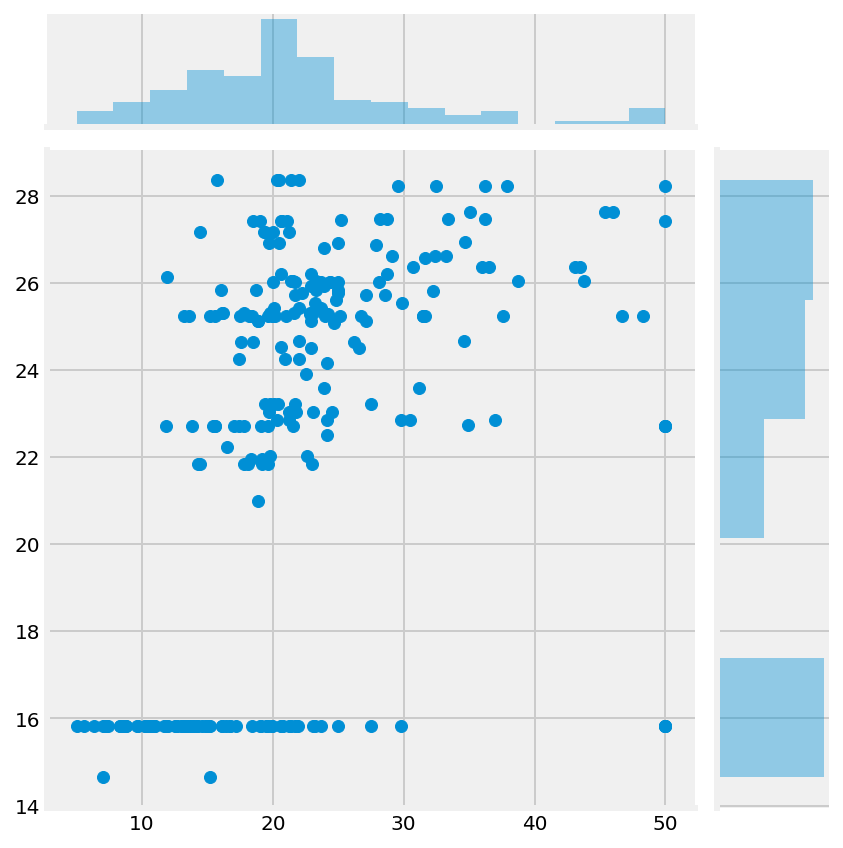

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.5278512863380682
test score:  0.43422998377535776


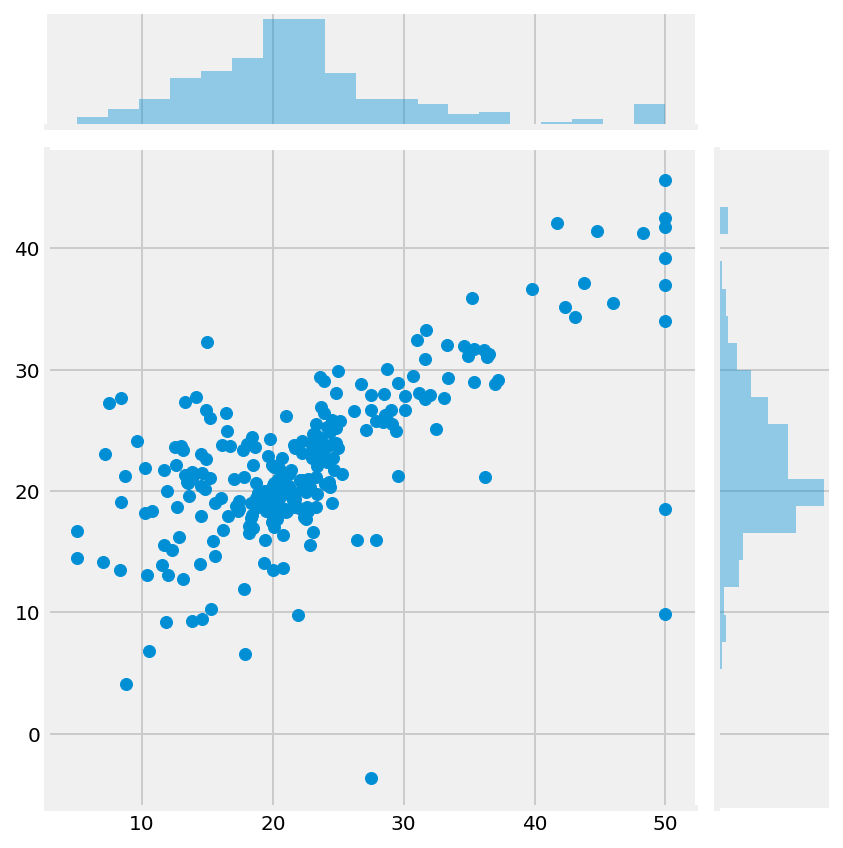

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=.5, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.5424959868250132
test score:  0.43106273174770476


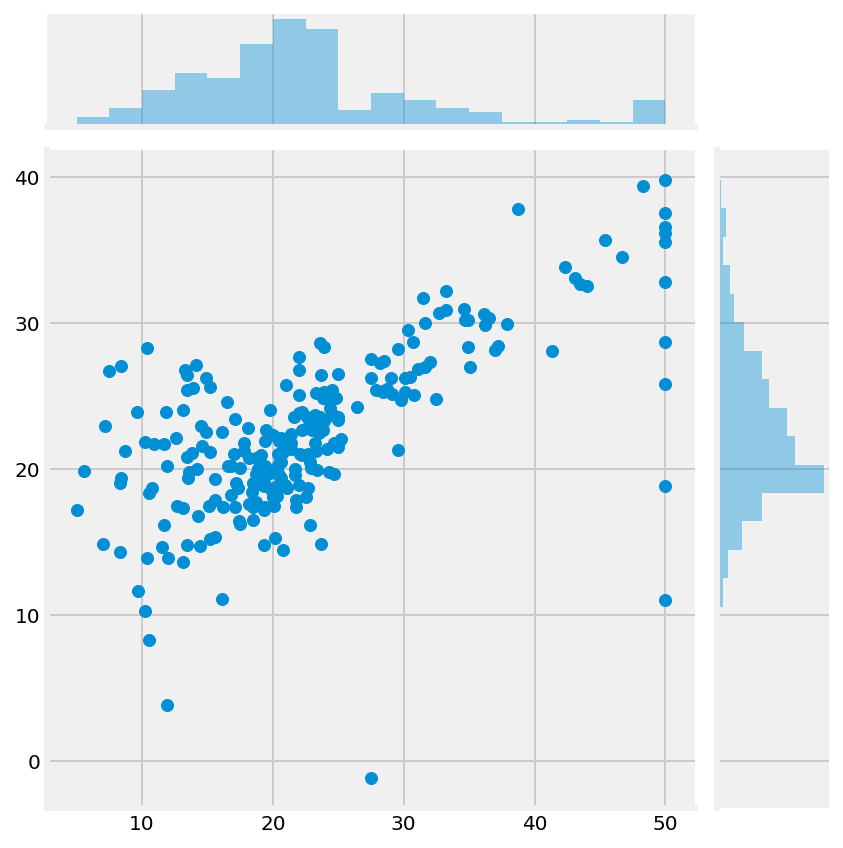

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=.5, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

train score:  0.13885201479371279
test score:  0.1494736230206145


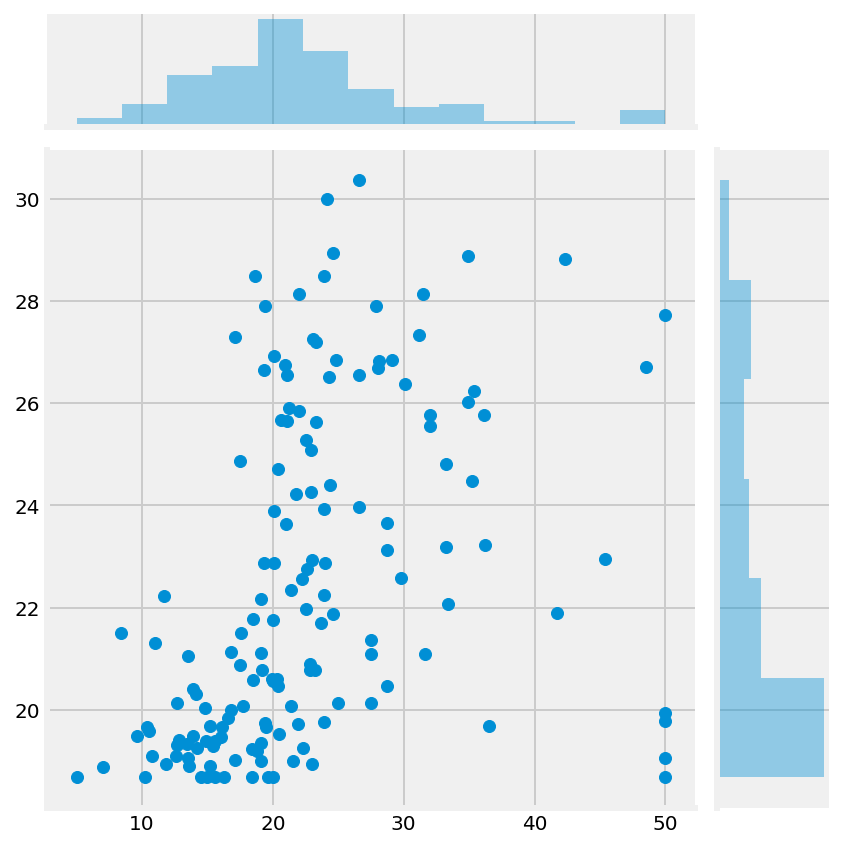

In [37]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=.3, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.2275276919904743
test score:  0.20095939236749935


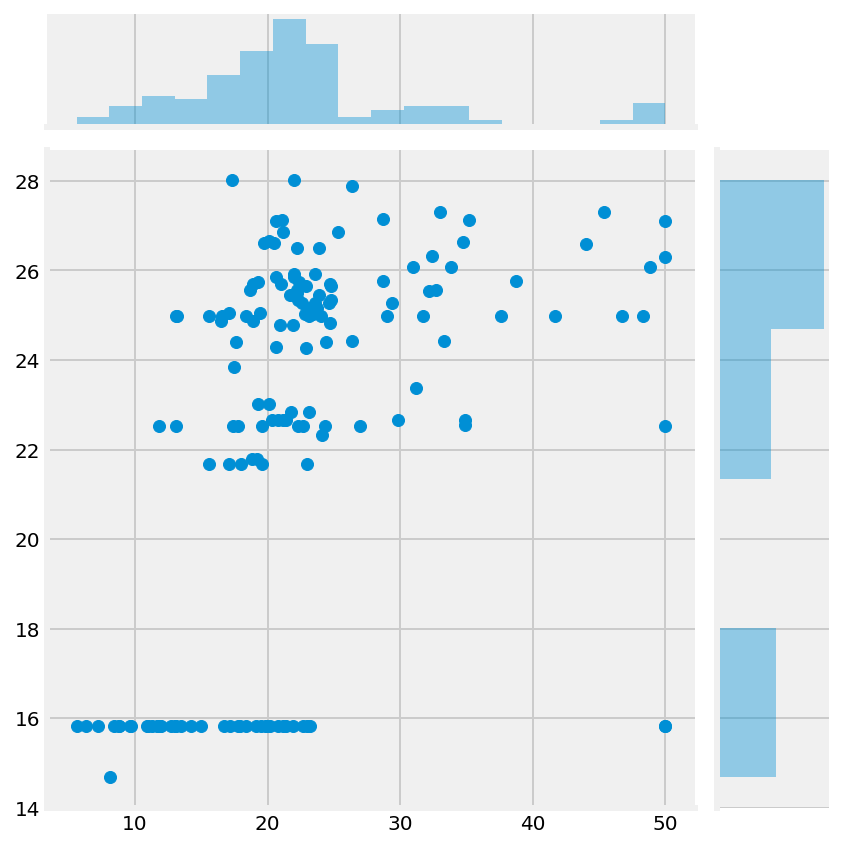

In [38]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=.3, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.524946024138176
test score:  0.3597599234474702


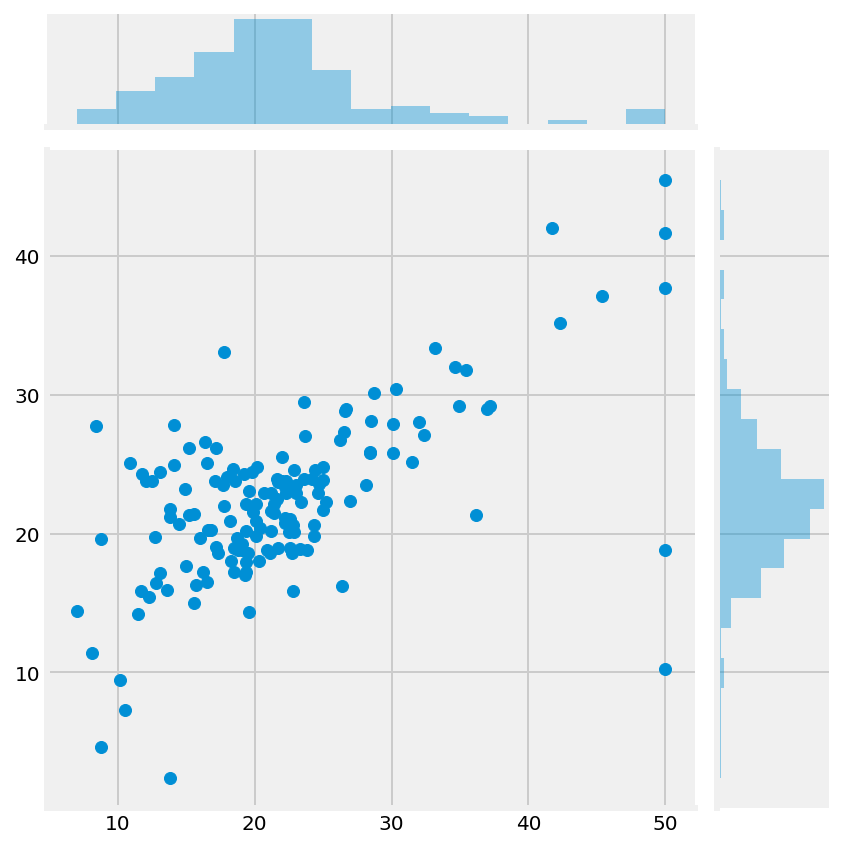

In [39]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=.3, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.1744969576727453
test score:  0.07905749416296713


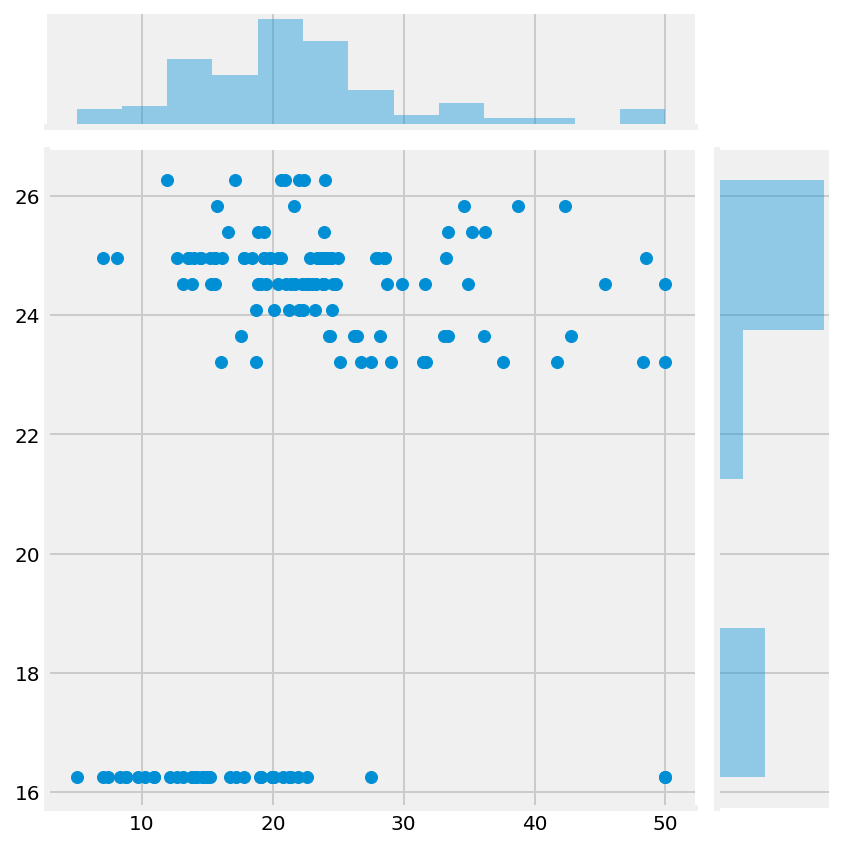

In [40]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x4, y, test_size=.3, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.15459532822163025
test score:  0.07592542959747306


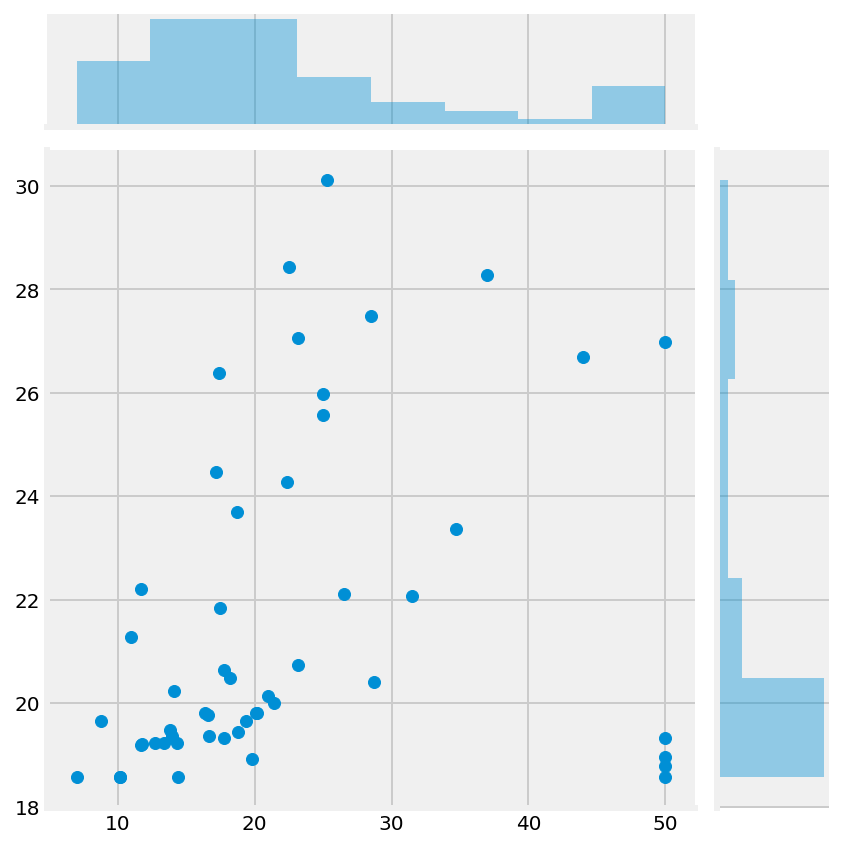

In [41]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=.1, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.23353987050617184
test score:  0.061864421915786005


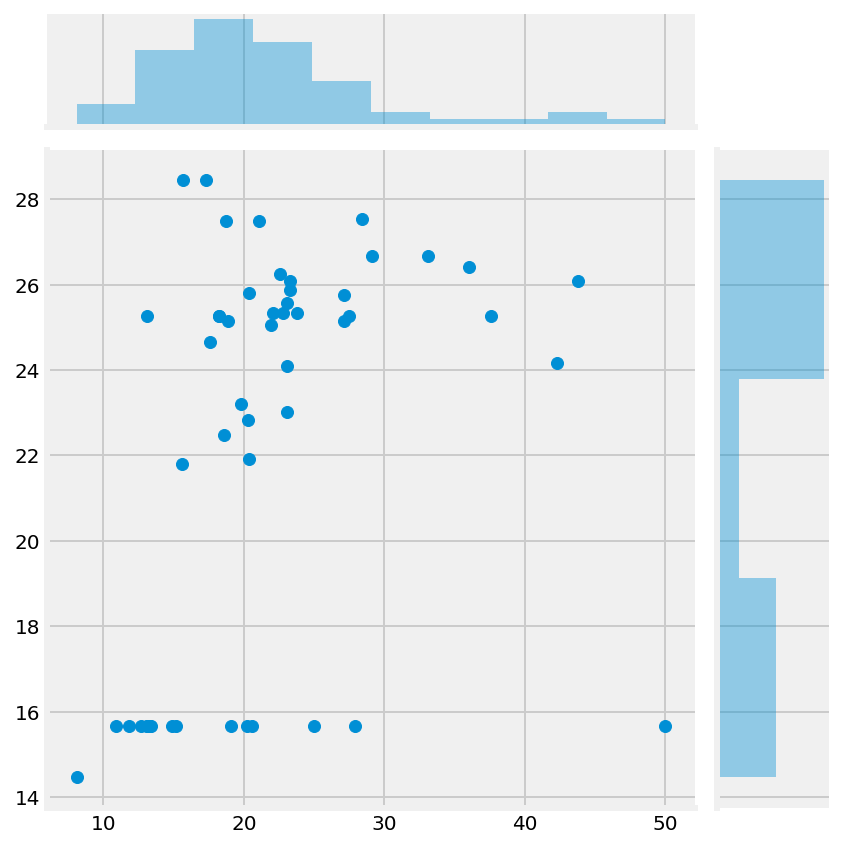

In [42]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=.1, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.5000989666378874
test score:  0.21958284909886916


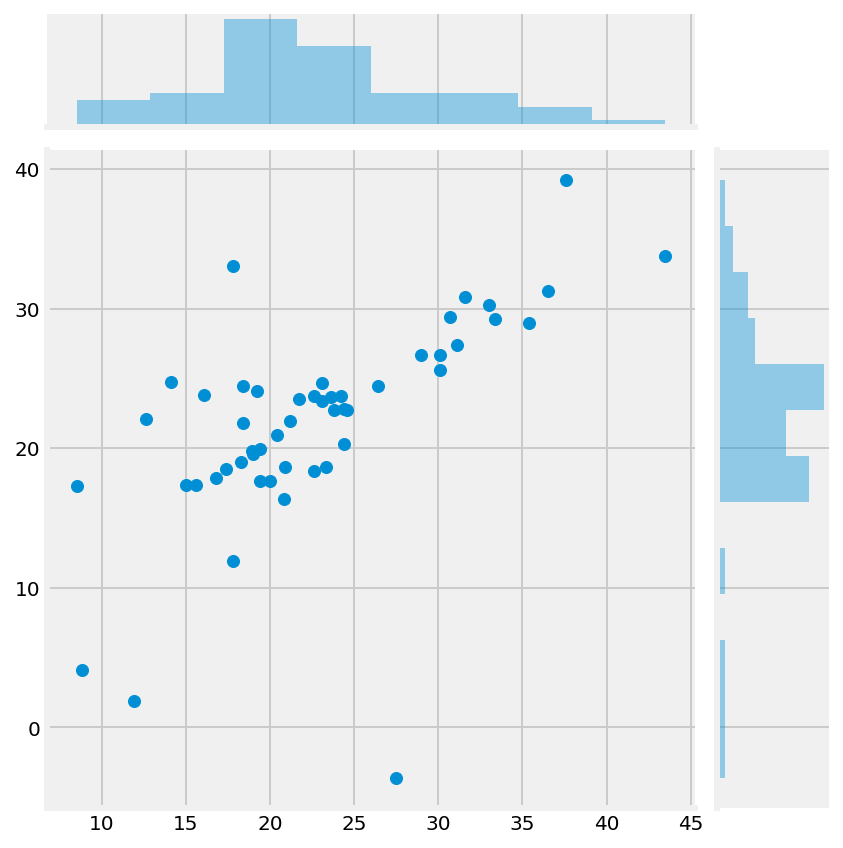

In [43]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=.1, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

train score:  0.13757257742122597
test score:  0.2351976105660445


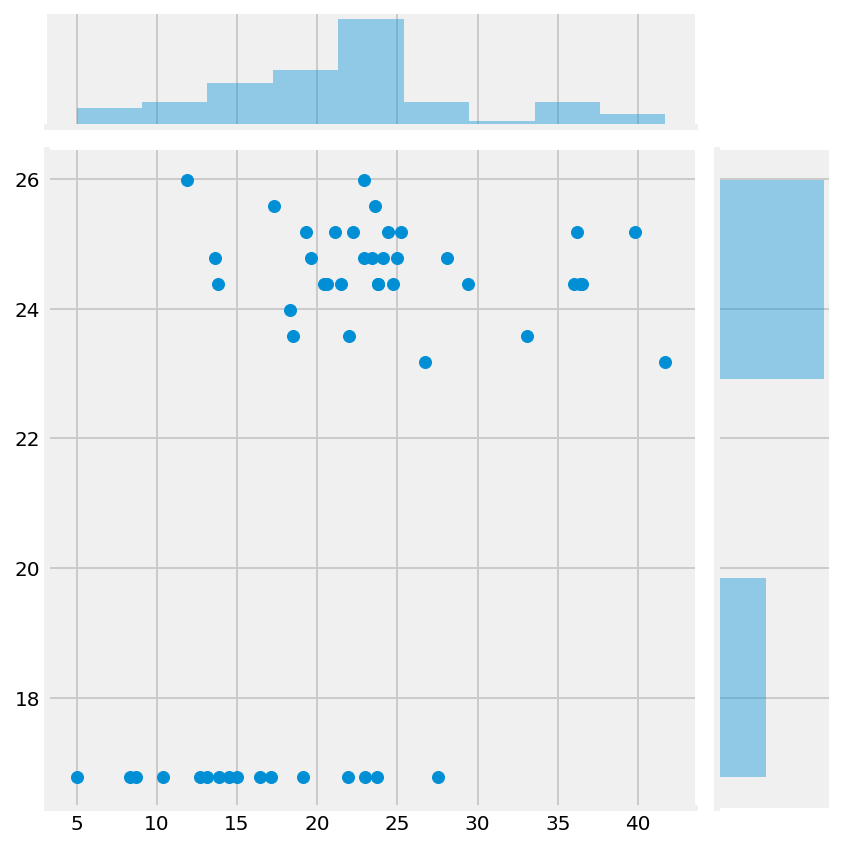

In [44]:
# A:
X_train, X_test, y_train, y_test = train_test_split(x4, y, test_size=.1, shuffle= True)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train score: ' ,lr.score(X_train, y_train))
print('test score: ' ,lr.score(X_test, y_test))
sns.jointplot(y_test,lr.predict(X_test))

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [45]:
# A:
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score

In [46]:
kf = KFold(n_splits=5, shuffle=True)

In [47]:
lr = LinearRegression()
cross_val_score(lr, x1, y, cv=kf)


array([0.14382093, 0.14189524, 0.05127653, 0.091758  , 0.25472876])

In [48]:
np.mean(cross_val_score(lr, x1, y, cv=kf))

0.12355991421710635

In [52]:
cross_val_score(lr, x2, y, cv=kf)
np.mean(cross_val_score(lr, x2, y, cv=kf))


0.1961592401073446

In [53]:
cross_val_score(lr, x3, y, cv=kf)

np.mean(cross_val_score(lr, x3, y, cv=kf))

0.4543882109632225

In [51]:
np.mean(cross_val_score(lr, x4, y, cv=kf))

#np.mean(cross_val_score(lr, x2, y, cv=kf))


0.1381423216879864

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [8]:
# A:


### 5.1) Explain what could be wrong with this approach.

In [9]:
# A: